# Iniciación en Python con Aplicaciones en Aceración (día 01)

**Dr. Edgar Ivan Castro Cedeño**

[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

# 4. matplotlib

## 4.1 librerías para visualizaciones

`matplotlib` es una de varias alternativas para efectuar visualizaciones con Python. Algunas alternativas son:

- [Matplotlib](https://matplotlib.org/), una librería muy popular para propósitos generales, enfocada en crear visualizaciones estáticas en 2D y 3D.

- [Bokeh](https://pydata.org/project/bokeh/) t [Plotly](https://plotly.com/), son librerias enfocadas en crear visualizaciones interactivas.

- [Seaborn](https://seaborn.pydata.org/), una libreria enfocada en visualización estadística, basa en Matplotlib.

- [Mayavi](https://docs.enthought.com/mayavi/mayavi/), una librería enfocada en visualización en 3D, usando el software [VTK](https://vtk.org/) para visualización científica.

- [ParaView](https://www.paraview.org/), es un software de visualización basado en [VTK](https://vtk.org/), que puede ser comandado desde aplicaciones con Python.

- [VisPy](https://vispy.org/), es una librería basada en OpenGL para visualizaciones en 2D y 3D, con enfoque visualizaciones interactivas.

## 4.2 Importar Matplotlib

In [1]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## 4.3 Ejemplos iniciales

Los gráficos de `matplotlib` están estructurados en términos de una figura `Figure` que puede contener uno o varios ejes `Axes`.

Cada uno de los ejes `Axes` contiene un sistema de coordenadas que permite graficar una gran variedad de gráficos.

### 4.3.1 Figura con un solo gráfico

In [2]:
# calcular datos para graficar
x = np.linspace(0, 2*np.pi, 1000)
y1 = np.sin(x)
y2 = np.cos(x)

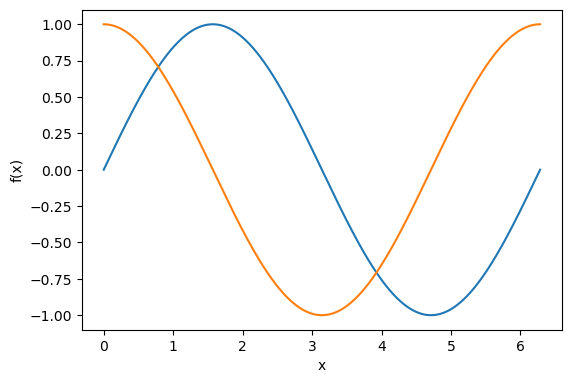

In [3]:
fig = plt.figure(figsize=(6,4))

# coordenadas de Axes como fracciones del ancho y la altura de la figura
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes((left, bottom, width, height))

# graficar datos
ax.plot(x, y1, label='sin(x)')
ax.plot(x, y2, label='cos(x)')
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

# guardar figura
cwd = os.getcwd()
subDir = 'output'
filename = 'graph01.png'
path = os.path.join(cwd, subDir, filename)
fig.savefig(path, dpi=300)
plt.show()

### 4.3.2 Figura con múltiples gráficos

In [4]:
# calcular datos para graficar
x = np.linspace(0, 2*np.pi, 1000)
y1 = np.sin(x)
y2 = np.cos(x)

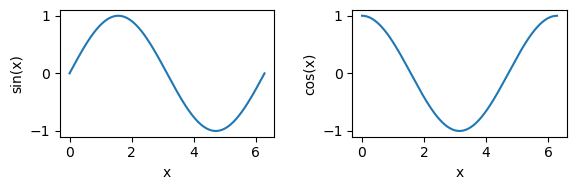

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 2))

# graficar datos
axes[0].plot(x, y1, label='sin(x)')
axes[1].plot(x, y2, label='cos(x)')
for ax in axes:
    ax.set_xlabel('x')
axes[0].set_ylabel('sin(x)')
axes[1].set_ylabel('cos(x)')

fig.tight_layout()

## 4.4 Formato general de gráficos

### 4.4.1 Formato de líneas

In [6]:
x = np.linspace(-5, 5, 5)
y = np.ones_like(x)

In [7]:
def axes_settings(fig, ax, title, ymax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(0, ymax+1)
    ax.set_title(title)

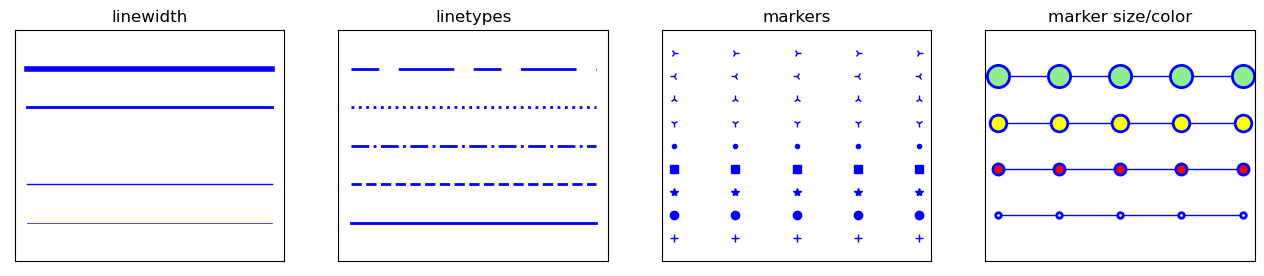

In [8]:
fig, axes = plt.subplots(1, 4, figsize=(16, 3))

# Line width
linewidths = [0.5, 1,0, 2.0, 4.0]
for n, linewidth in enumerate(linewidths):
    axes[0].plot(x, y+n, color="blue", linewidth=linewidth)
axes_settings(fig, axes[0], "linewidth", len(linewidths))

# Line style
linestyles = ['-', '--', '-.', ':']
for n, linestyle in enumerate(linestyles):
    axes[1].plot(x, y+n, color="blue", lw=2, linestyle=linestyle)
# custon dash style
line, = axes[1].plot(x, y+4, color="blue", lw=2)
length1, gap1, length2, gap2 = 10, 7, 20, 7
line.set_dashes([length1, gap1, length2, gap2])
axes_settings(fig, axes[1], "linetypes", len(linestyles)+1)

# marker type
markers = ['+', 'o', '*', 's', '.', '1', '2', '3', '4']
for n, marker in enumerate(markers):
    # lw = shorthand for linewidth, ls = shorthand for linestyle
    axes[2].plot(x, y+n, color="blue", lw=2, ls='None', marker=marker)
axes_settings(fig, axes[2], "markers", len(markers))

# marker size and color
markersizecolors = [(4, "white"), (8, "red"), (12, "yellow"), (16, "lightgreen")]
for n, (markersize, markerfacecolor) in enumerate(markersizecolors):
    axes[3].plot(x, y+n, color="blue", lw=1, ls='-', 
                 marker='o', markersize=markersize, 
                 markerfacecolor=markerfacecolor, markeredgewidth=2)
axes_settings(fig, axes[3], "marker size/color", len(markersizecolors))

plt.show()

### 4.4.2 Formato de leyendas

In [9]:
x = np.linspace(0, 1, 100)
y1 = x
y2 = x**2

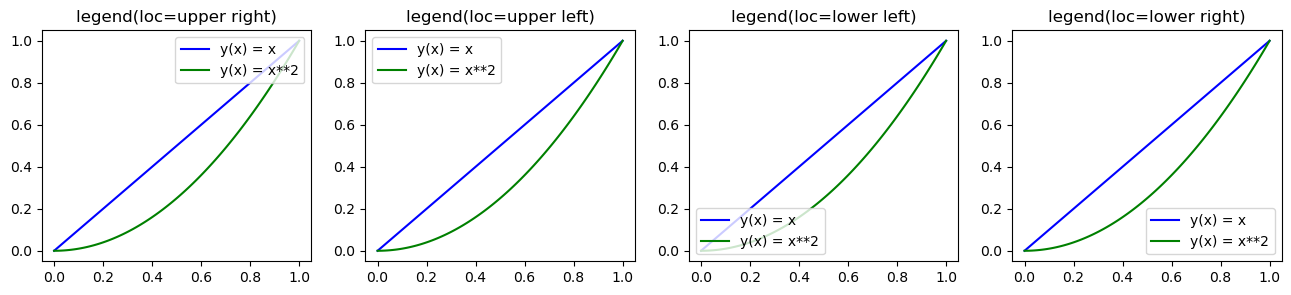

In [10]:
fig, axes = plt.subplots(ncols=4, figsize=(16, 3))

locs = ['upper right', 'upper left', 'lower left', 'lower right']
for idx, loc in enumerate(locs):
    axes[idx].plot(x, y1, color="blue", label="y(x) = x")
    axes[idx].plot(x, y2, color="green", label="y(x) = x**2")
    axes[idx].set_title("legend(loc={:})".format(loc))
    axes[idx].legend(loc=loc)
plt.show()

In [11]:
x = np.linspace(-1, 1, 1000)

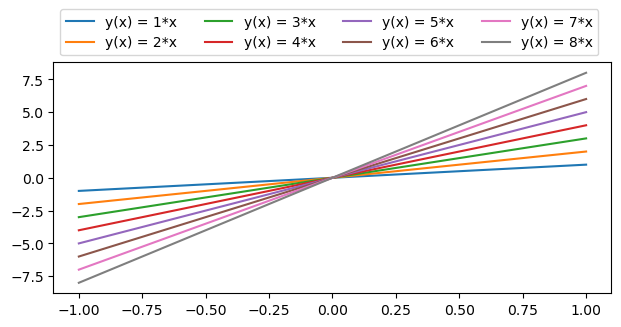

In [12]:
fig, ax = plt.subplots(figsize=(7.2, 3))

for n in range(1,9):
    ax.plot(x, n*x, label="y(x) = {:}*x".format(n))
ax.legend(ncol=4, loc='lower left', bbox_to_anchor=(0,1))
plt.show()

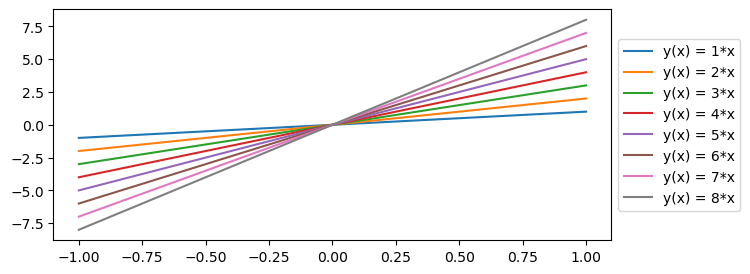

In [13]:
fig, ax = plt.subplots(figsize=(7.2, 3))

for n in range(1,9):
    ax.plot(x, n*x, label="y(x) = {:}*x".format(n))
ax.legend(ncol=1, loc='center left', bbox_to_anchor=(1,0.5))
plt.show()

### 4.4.3 Formato de anotaciones

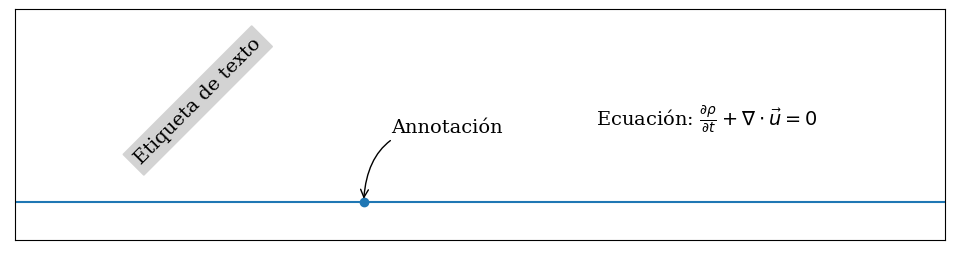

In [14]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(-0.5, 3.5)
ax.set_ylim(-0.05, 0.25)
ax.axhline(0)

# text label
ax.text(0, 0.05, "Etiqueta de texto", fontsize=14, family='serif', rotation=45, backgroundcolor='lightgray')

# annotation
ax.plot(1, 0, 'o')
ax.annotate("Annotación", fontsize=14, family='serif', xy=(1,0), xycoords='data',
            xytext=(+20, +50), textcoords="offset points",
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=0.5"))

# equation
ax.text(2, 0.1, r"Ecuación: $\frac{\partial \rho}{\partial t} + \nabla \cdot \vec{u} = 0$", fontsize=14, family="serif")

plt.show()

### 4.4.4 Formato de ejes

In [15]:
x = np.linspace(0, 50, 500)
y = np.sin(x) * np.exp(-x/10)

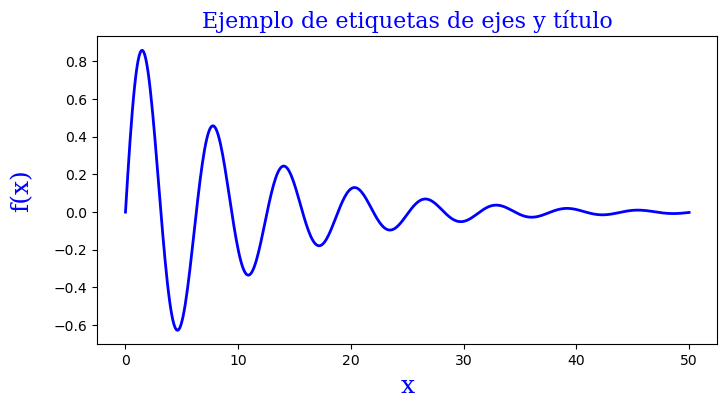

In [16]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y, linewidth=2, color='blue')

ax.set_xlabel("x", labelpad=5, fontsize=18, fontname='serif', color='blue')
ax.set_ylabel("f(x)", labelpad=15, fontsize=18, fontname='serif', color='blue')
ax.set_title("Ejemplo de etiquetas de ejes y título", fontsize=16, fontname='serif', color='blue')
plt.show()

In [17]:
x = np.linspace(0, 30, 500)
y = np.sin(x) * np.exp(-x/10)

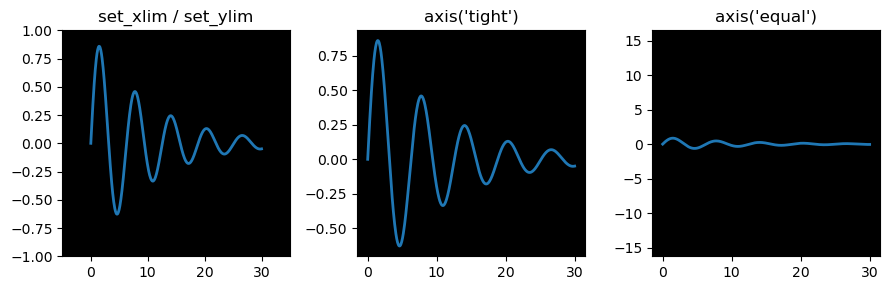

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3), subplot_kw={'facecolor': '#000000'})

axes[0].plot(x, y, lw=2)
axes[0].set_xlim(-5, 35)
axes[0].set_ylim(-1, 1)
axes[0].set_title("set_xlim / set_ylim")

axes[1].plot(x, y, lw=2)
axes[1].axis('tight')
axes[1].set_title("axis('tight')")

axes[2].plot(x, y, lw=2)
axes[2].axis('equal')
axes[2].set_title("axis('equal')")

fig.tight_layout()

plt.show()

### 4.4.5 Formato de marcadores

In [19]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 500)
y = np.sin(x) * np.exp(-x**2 / 20)

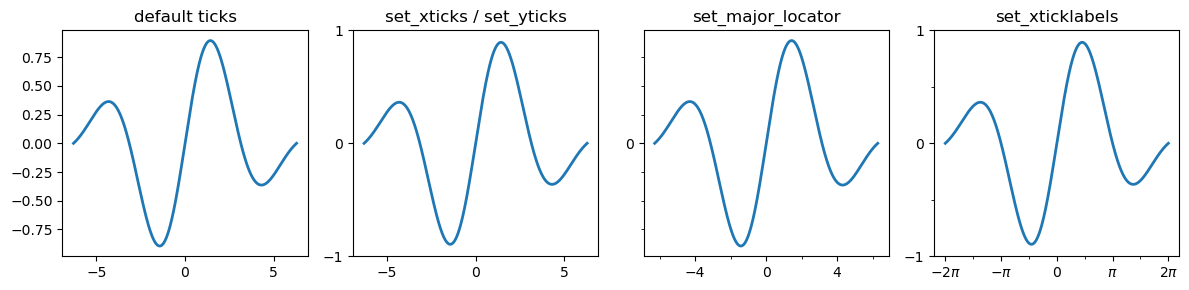

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 3))

axes[0].plot(x, y, lw=2)
axes[0].set_title("default ticks")

axes[1].plot(x, y, lw=2)
axes[1].set_title("set_xticks / set_yticks")
axes[1].set_yticks([-1, 0, 1])
axes[1].set_xticks([-5, 0, 5])

axes[2].plot(x, y, lw=2)
axes[2].set_title("set_major_locator")
axes[2].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[2].yaxis.set_major_locator(mpl.ticker.FixedLocator([-1, 0, 1]))
axes[2].xaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))
axes[2].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))

axes[3].plot(x, y, lw=2)
axes[3].set_title("set_xticklabels")
axes[3].set_yticks([-1, 0, 1])
axes[3].set_xticks([-2*np.pi, -np.pi, 0, np.pi, 2*np.pi])
axes[3].set_xticklabels([r'$-2\pi$', r'$-\pi$', 0, r'$\pi$', r'$2\pi$'])
x_minor_ticker = mpl.ticker.FixedLocator([-3/2*np.pi, -np.pi/2, 0, np.pi/2, 3/2*np.pi])
axes[3].xaxis.set_minor_locator(x_minor_ticker)
axes[3].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(4))

fig.tight_layout()
plt.show()

In [21]:
x = np.linspace(0, 1e5, 100)
y = x**2

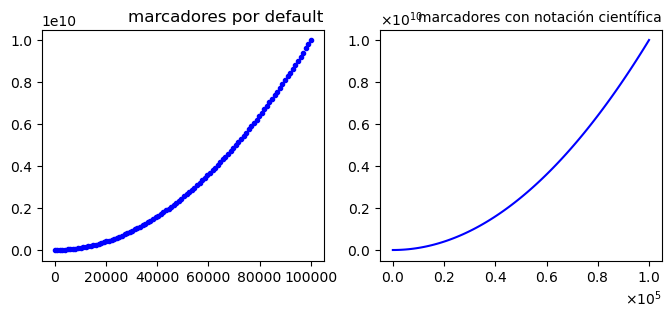

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

axes[0].plot(x, y, ls='', marker='.', color='blue')
axes[0].set_title("marcadores por default", loc="right")

axes[1].plot(x, y, ls='-', color='blue')
axes[1].set_title("marcadores con notación científica", fontsize=10, loc="right")

formatter = mpl.ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1, 1))
axes[1].xaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(formatter)

plt.show()

### 4.4.6 Formato de cuadrículas

In [23]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 500)
y = np.sin(x) * np.exp(-x**2 / 20)

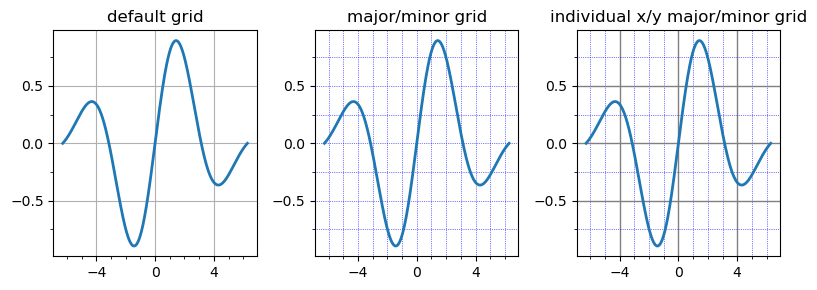

In [24]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(8, 3))

x_major_ticker = mpl.ticker.MultipleLocator(4)
x_minor_ticker = mpl.ticker.MultipleLocator(1)
y_major_ticker = mpl.ticker.MultipleLocator(0.5)
y_minor_ticker = mpl.ticker.MultipleLocator(0.25)

for ax in axes:
    ax.plot(x, y, lw=2)
    ax.xaxis.set_major_locator(x_major_ticker)
    ax.yaxis.set_major_locator(y_major_ticker)
    ax.xaxis.set_minor_locator(x_minor_ticker)
    ax.yaxis.set_minor_locator(y_minor_ticker)
    
axes[0].set_title("default grid")
axes[0].grid()

axes[1].set_title("major/minor grid")
axes[1].grid(color="blue", which="both", linestyle=':', linewidth=0.5)

axes[2].set_title("individual x/y major/minor grid")
axes[2].grid(color="grey", which="major", axis='x', linestyle='-', linewidth=1.0)
axes[2].grid(color="blue", which="minor", axis='x', linestyle=':', linewidth=0.5)
axes[2].grid(color="grey", which="major", axis='y', linestyle='-', linewidth=1.0)
axes[2].grid(color="blue", which="minor", axis='y', linestyle=':', linewidth=0.5)

fig.tight_layout()
plt.show()

## 4.5 Gráficos logarítmicos

Los gráficos con escalas logarítmicas son de utilidad cuando el rango de los datos es sobre varios órdenes de magnitud.
En `matplotlib` existen funciones que permiten trazar este tipo de gráficos

- `loglog()`: escala logarítmica para ambos ejes
- `semilogx`: escala logarítmica para el eje x (horizontal).
- `semilogy`: escala logarítmica para el eje y (vertical).

Otra alternativa es utilizar graficar con la función `plot()`, y posteriomente configurar las escalar de los ejemes utilizando los métodos `set_xscale` y/o `set_yscale`.

In [25]:
x = np.linspace(1, 1e3, 1000)
y1, y2 = x**3, x**4

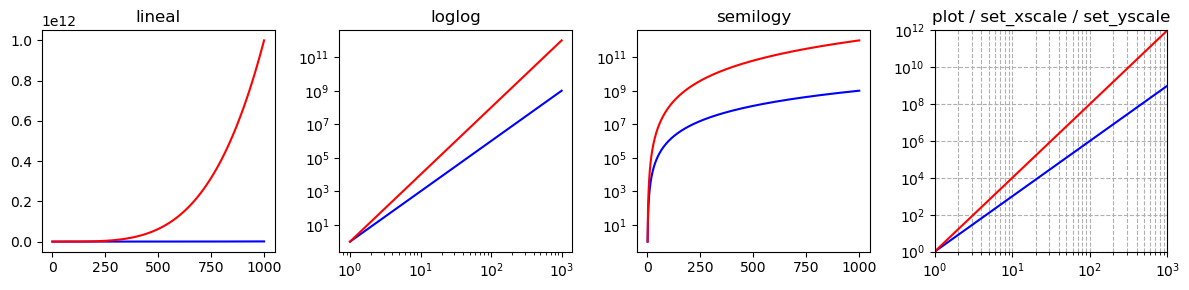

In [26]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 3))

axes[0].plot(x, y1, 'b', x, y2, 'r')
axes[0].set_title('lineal')

axes[1].loglog(x, y1, 'b', x, y2, 'r')
axes[1].set_title('loglog')

axes[2].semilogy(x, y1, 'b', x, y2, 'r')
axes[2].set_title('semilogy')

axes[3].plot(x, y1, 'b', x, y2, 'r')
axes[3].set_title('plot / set_xscale / set_yscale')
axes[3].set_xscale('log')
axes[3].set_yscale('log')
axes[3].set_xlim(1e0, 1e3)
axes[3].set_ylim(1e0, 1e12)
axes[3].grid(ls='--', which='both')

fig.tight_layout()
plt.show()

## 4.6 Gráficos con ejes compartidos

`matplotlib`  permite graficar dos ejes independientes superpuestos uno sobre otro, usando los métodos `twinx()` y `twiny()`.


- El método `twinx()` permite crear una nueva instancia `Axes` con el eje `x` compartido y el eje `y` independiente, y cuya escala se muestra del lado derecho del gráfico.
- El método `twiny()` permite crear una nueva instancia `Axes` con eje `y` compartido y el eje `x` independiente, y cuya escala se muestra encima del gráfico.

In [27]:
r = np.linspace(0, 5, 100)
a = 4 * np.pi * r**2    # area
v = (4/3 * np.pi) * r**3    # volumen

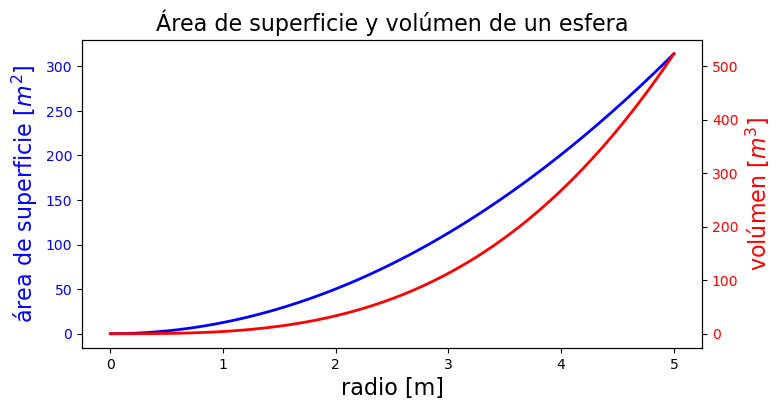

In [28]:
fig, ax1 = plt.subplots(figsize=(8, 4))

ax1.set_title("Área de superficie y volúmen de un esfera", fontsize=16)
ax1.set_xlabel("radio [m]", fontsize=16)

ax1.plot(r, a, lw=2, color="blue")
ax1.set_ylabel(r"área de superficie [$m^2$]", fontsize=16, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(r, v, lw=2, color='red')
ax2.set_ylabel(r"volúmen [$m^3$]", fontsize=16, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")
    
plt.show()

## 4.7 Gráficos de barras

`matplotlib`  permite crear gráficos de barras utilizando el método `bar()`.

In [29]:
animal_names = ['León', 'Gacela', 'Guepardo']
kph_speed = [80, 96, 120]

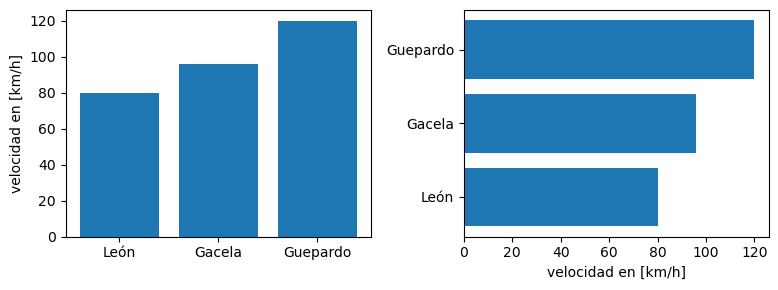

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,3))

# barras verticales
ax[0].bar(animal_names, kph_speed)
ax[0].set_ylabel('velocidad en [km/h]')

# barras horizontales
ax[1].barh(animal_names, kph_speed)
ax[1].set_xlabel('velocidad en [km/h]')

fig.tight_layout()
plt.show()

## 4.8 Gráficos de contornos

In [31]:
x = np.linspace(0, 1, 150)
y = np.flip(x)
X, Y = np.meshgrid(x, y)
Z = np.abs(X**2 - Y**2)

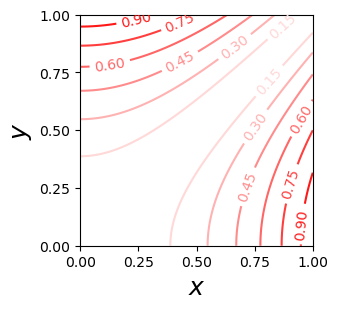

In [32]:
fig, ax = plt.subplots(figsize=(3, 3))

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())
cs = ax.contour(X, Y, Z, norm=norm, cmap=mpl.cm.bwr)
ax.clabel(cs, fmt='%1.2f', inline=True, fontsize=10)

ax.axis("tight")
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))

plt.show()

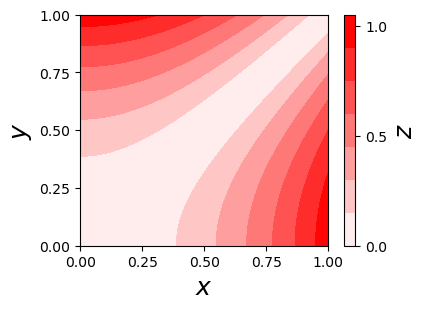

In [33]:
fig, ax = plt.subplots(figsize=(4, 3))

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())
cs = ax.contourf(X, Y, Z, norm=norm, cmap=mpl.cm.bwr)

ax.axis("tight")
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))

cb = fig.colorbar(cs, ax=ax)
cb.set_label(r"$z$", fontsize=18)
cb.set_ticks([0, 0.5, 1])

plt.show()

## 4.9 Referecias / Documentación

- https://www.python.org/doc/

- https://matplotlib.org/stable/index.html

- https://matplotlib.org/stable/gallery/index.html

- https://link.springer.com/book/10.1007/978-1-4842-4246-9